## Metody Nieparametryczne w Statystyce
# Zadanie 6
Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa, testu Lillieforsa i testu Andersona-Darlinga (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane pochodzą z rozkładu 𝑡-Studenta (uwaga: żeby wyniki były porównywalne trzeba pamiętać o standaryzacji danych).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [5]:
import numpy as np, pandas as pd
from scipy.stats import kstest, anderson
from statsmodels.stats.diagnostic import lilliefors

2. Badanie mocy testów dla danych z rozkładu t-Studenta.

a) test Kołmogorowa

<Axes: >

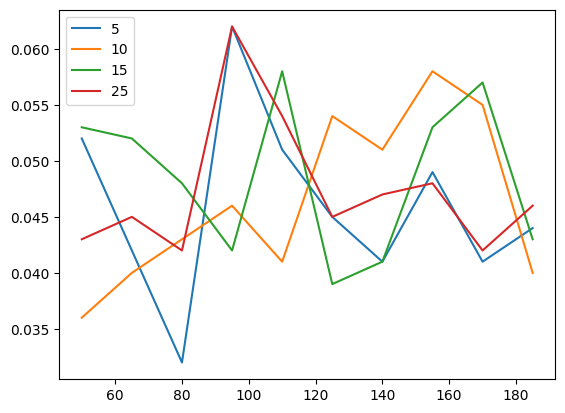

In [8]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (50, 200, 15):
    for i in range (0, 1000):
        for m in [5, 10, 15, 25]:
            #generowanie dwóch wektorów liczbowych:
            #  - regularnego, oddającego kształt rozkładu chi-kwadrat o długości n i m stopniach swobody
            x = np.random.normal(0, 1, n)
            xdf = np.random.standard_t(n, m)
            
            #testy
            buf.append(kstest(xdf, x)[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()

b) test lilieforsa

<Axes: >

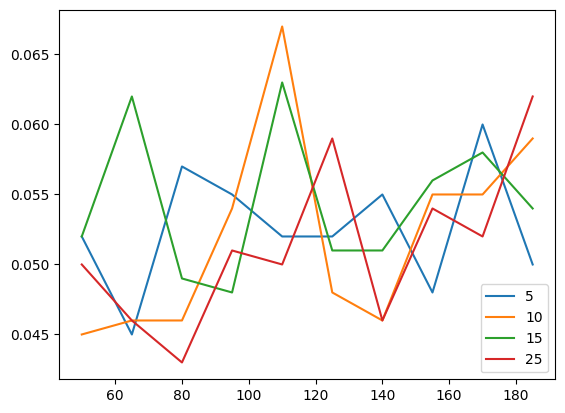

In [10]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (50, 200, 15):
    for i in range (0, 1000):
        for m in [5, 10, 15, 25]:
            #generowanie dwóch wektorów liczbowych:
            #  - regularnego, oddającego kształt rozkładu chi-kwadrat o długości n i m stopniach swobody
            x = np.random.normal(0, 1, n)
            xdf = np.random.standard_t(n, m)
            
            #testy
            buf.append(lilliefors(xdf, 'norm')[1] < .05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
results.plot()